### LSTM

### Import Library

In [53]:
import torch 
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import TensorDataset, DataLoader 
import numpy as np

In [54]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cpu'

### Dataset

In [55]:
training_x = torch.FloatTensor([[32],
                            [37],
                            [25]])
training_x

tensor([[32.],
        [37.],
        [25.]])

In [56]:
training_y = torch.FloatTensor([[34],
                            [36],
                            [24]])
training_y

tensor([[34.],
        [36.],
        [24.]])

In [57]:
testing_x = torch.FloatTensor([[27]])
testing_x

tensor([[27.]])

In [58]:
testing_y = torch.FloatTensor([[28]])
testing_y

tensor([[28.]])

### Define Train-Test Data

In [59]:
dataset = TensorDataset(training_x, training_y)
dataset

In [60]:
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)
train_loader

### Model

In [61]:
class LSTMModeler(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTMModeler, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,hidden_layer_size),
                            (torch.zeros(1,1,hidden_layer_size)))

    def forward(self, x):
        lstm_out, self.hidden_cell = self.lstm(x.view(len(x), 1, 1), self.hidden_cell)
        out = self.linear(lstm_out.view(len(x), -1))
        return out[-1]

### Setup Loss Function and Optimizer

In [62]:
losses = []
hidden_layer_size = 10
input_size = 1 
output_size = 1
model = LSTMModeler(input_size, hidden_layer_size, output_size).to(device)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [63]:
model

LSTMModeler(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [64]:
epochs = 100 

for epoch in range(epochs):
    total_loss = 0
    print("epoch : ", epoch)
    for (x, y) in train_loader:
        x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)

        model.zero_grad()

        model.hidden_cell = (torch.zeros(1,1,hidden_layer_size).to(device),
                            torch.zeros(1,1,hidden_layer_size).to(device))

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    losses.append(total_loss)

epoch :  0
epoch :  1
epoch :  2
epoch :  3
epoch :  4
epoch :  5
epoch :  6
epoch :  7
epoch :  8
epoch :  9
epoch :  10
epoch :  11
epoch :  12
epoch :  13
epoch :  14
epoch :  15
epoch :  16
epoch :  17
epoch :  18
epoch :  19
epoch :  20
epoch :  21
epoch :  22
epoch :  23
epoch :  24
epoch :  25
epoch :  26
epoch :  27
epoch :  28
epoch :  29
epoch :  30
epoch :  31
epoch :  32
epoch :  33
epoch :  34
epoch :  35
epoch :  36
epoch :  37
epoch :  38
epoch :  39
epoch :  40
epoch :  41
epoch :  42


C:\Users\araya\AppData\Local\Temp\ipykernel_15268\1278615529.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)


epoch :  43
epoch :  44
epoch :  45
epoch :  46
epoch :  47
epoch :  48
epoch :  49
epoch :  50
epoch :  51
epoch :  52
epoch :  53
epoch :  54
epoch :  55
epoch :  56
epoch :  57
epoch :  58
epoch :  59
epoch :  60
epoch :  61
epoch :  62
epoch :  63
epoch :  64
epoch :  65
epoch :  66
epoch :  67
epoch :  68
epoch :  69
epoch :  70
epoch :  71
epoch :  72
epoch :  73
epoch :  74
epoch :  75
epoch :  76
epoch :  77
epoch :  78
epoch :  79
epoch :  80
epoch :  81
epoch :  82
epoch :  83
epoch :  84
epoch :  85
epoch :  86
epoch :  87
epoch :  88
epoch :  89
epoch :  90
epoch :  91
epoch :  92
epoch :  93
epoch :  94
epoch :  95
epoch :  96
epoch :  97
epoch :  98
epoch :  99


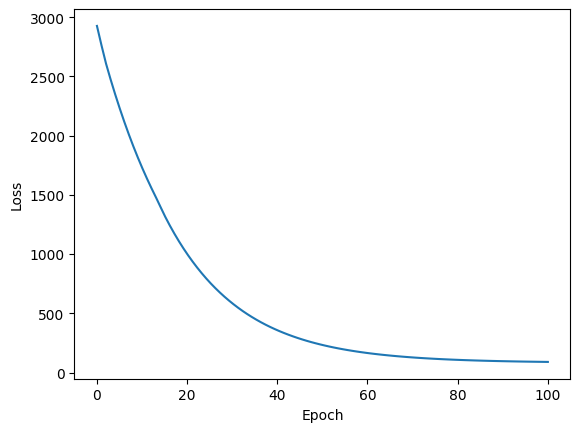

In [66]:
import matplotlib.pyplot as plt 

def plot_losses(ax, t, losses):
    ax.plot(t, losses)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

fig, ax = plt.subplots()
plot_losses(ax, np.linspace(0, len(losses), len(losses)), losses)

In [67]:
for x, y in zip(testing_x, testing_y):
    # Get predicted vector
    with torch.no_grad():
        model.hidden_cell = (torch.zeros(1,1,hidden_layer_size).to(device),
                            torch.zeros(1,1,hidden_layer_size).to(device))

        x = x.view(-1,1,1).to(device)

        pred = model(x)

    print(f"y_true: {int(y.item())}, y_hat: {int(pred.item())}")

y_true: 28, y_hat: 29


### -------------------------------------------------------------------------------------------------------------------------------------------- ###

In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader 
import numpy as np

### Dataset

In [4]:
x_train = torch.FloatTensor([[2,4,6],
                            [1,2,3],
                            [4,5,6],
                            [10,8,6]])
x_train

tensor([[ 2.,  4.,  6.],
        [ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [10.,  8.,  6.]])

In [6]:
y_train = torch.FloatTensor([[8],
                    [4],
                    [7],
                    [4]])
y_train

tensor([[8.],
        [4.],
        [7.],
        [4.]])

In [7]:
x_test = torch.FloatTensor([[20,18,16]])
x_test

tensor([[20., 18., 16.]])

In [8]:
y_test = torch.FloatTensor([[14]])
y_test

tensor([[14.]])

### Define Train-Test Data

In [9]:
dataset = TensorDataset(x_train, y_train)
dataset

In [10]:
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)
train_loader

### Model

In [11]:
class LSTM2(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(LSTM2, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,hidden_size),
                            torch.zeros(1,1,hidden_size))

    def forward(self, x):
        lstm_out, self.hidden_cell = self.lstm(x.view(len(x),1,1), self.hidden_cell)
        out = self.linear(linear_out.view(len(x), -1))
        return out[-1]
        

### Set Loss Function and Optimizer

In [22]:
losses = []
hidden_size = 10
input_size = 4
output_size = 1
model = LSTM2(input_size, hidden_size, output_size)
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [23]:
model

LSTM2(
  (lstm): LSTM(4, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)

In [24]:
epochs = 100 

for epoch in range(epochs):
    total_loss = 0
    print("epoch : ", epoch)
    for (x, y) in train_loader:
        x, y = torch.tensor(x), torch.tensor(y)

        model.zero_grad()

        model.hidden_cell = (torch.zeros(1,1,hidden_size),
                            torch.zeros(1,1,hidden_size))

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    losses.append(total_loss)

epoch :  0


C:\Users\araya\AppData\Local\Temp\ipykernel_4176\76382915.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x), torch.tensor(y)


RuntimeError: shape '[1, 1, 1]' is invalid for input of size 3